### **Import Library**


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import missingno 
import warnings
warnings.simplefilter(action='ignore')

### **Context**

Competition in the Pakistani e-commerce industry is getting tougher. This requires e-commerce companies to determine effective strategies in order to stay ahead of the competition. One of the first steps that can be taken to determine the right strategy is to analyze trends transactions e-commerce.

### **Problem Statements**

Based on the context above, I will try to do an analysis to help determine the right strategy based on the following questions:

<b> What is the trend of e-commerce transactions in Pakistan ? </b> <br>
<b> How can I enhance the trend of e-commerce transactions in Pakistan ? </b>
 

### **Data Understanding**

In [80]:
df = pd.read_csv(r'C:\Users\ASUS\Documents\Contoh Dataset\EPakistan.csv')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


The dataset contains information on e-commerce transactions in Pakistan from March 2016 to August 2018. It consists of 26 columns, namely: 

1. item_id: id for the ordered product.
2. status: order status updates.
3. created_at: order date.
4. sku: product name.
5. price: product unit price.
6. qty_order: total quantity of products ordered.
7. grand_total: total price of the ordered products.
8. increment_id: payment code.
9. category_name_1: product category name.
10. sales_commission_code: sales commission code.
11. discount_amount: the amount deducted as a discount.
12. payment_method: the payment method used.
13. Working Date: the date on which the order was processed.
14. BI status: the status indicating whether the transaction is net or other.
15. MV: the total order price to be paid.
16. Year: the year in which the transaction occurred.
17. Month: the month in which the transaction occurred.
18. Customer_Since: the information code representing the year & month in which the customer joined.
19. M-Y: the information code representing the months & year in which the transaction occurred.
20. FY: the year of the e-commerce financial budget.
21. Customer ID: the unique identifier for the customer.
22. Unnamed 21 : blank column
23. Unnamed 22 : blank column
24. Unnamed 23 : blank column
25. Unnamed 24 : blank column
26. Unnamed 25 : blank column

In [81]:
display(df.describe(include='object'),df.describe())

,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


In [82]:
data = []
for cols in df.columns:
    data.append([cols,df[cols].nunique(),df[cols].unique()])
    
table_data = pd.DataFrame(columns=['Columns','Nunique','Unique'],data=data)
table_data

,Columns,Nunique,Unique
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 21113..."
1,status,16,"[complete, canceled, order_refunded, received,..."
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2..."
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshen..."
4,price,9121,"[1950.0, 240.0, 2450.0, 360.0, 555.0, 80.0, 17..."
5,qty_ordered,74,"[1.0, 2.0, 5.0, 3.0, 4.0, 6.0, 10.0, 34.0, 9.0..."
6,grand_total,36829,"[1950.0, 240.0, 2450.0, 60.0, 1110.0, 80.0, 17..."
7,increment_id,408785,"[100147443, 100147444, 100147445, 100147446, 1..."
8,category_name_1,16,"[Women's Fashion, Beauty & Grooming, Soghaat, ..."
9,sales_commission_code,7226,"[\N, R-FSD-52352, 105259, R-KHW-104406, R-FSD-..."


In general, I can observe the following :

- The dataset consists of 26 columns and 584,524 rows. However, columns from `Unnamed: 21` to `Unnamed: 25` contain missing values. Therefore, I will delete these columns.
- I find that mostly customer joined & transaction occure in 'November'.
- 'Mobile & Tablets' is the most popular product category with +-19% from total transaction and 'cod' is the most popular payment method with +-46% from total transaction. 
- There are columns such as `Year`, `Month`, and `M-Y` that represent the occurrence of transactions. Hence, I will remove the `M-Y` column. Because `M-Y` is already defined by the `Year` and `Month` columns. 
- Additionally, I will delete the columns `sales_commission_code`, `BI Status` and `FY` as they are not relevant to the problem statement.
- Some columns, including `status`, `sku`, `category_name_1`, `Customer Since`, and `Customer ID` have missing values.

In [83]:
df = df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','M-Y','sales_commission_code','BI Status','FY'])

In [84]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,MV,Year,Month,Customer Since,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,7/1/2016,"1,950",2016.0,7.0,2016-7,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,240,2016.0,7.0,2016-7,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,7/1/2016,"2,450",2016.0,7.0,2016-7,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,7/1/2016,360,2016.0,7.0,2016-7,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,7/1/2016,"1,110",2016.0,7.0,2016-7,5.0


### **Data Cleaning**

#### 1. Missing Type Data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          584524 non-null  float64
 1   status           584509 non-null  object 
 2   created_at       584524 non-null  object 
 3   sku              584504 non-null  object 
 4   price            584524 non-null  float64
 5   qty_ordered      584524 non-null  float64
 6   grand_total      584524 non-null  float64
 7   increment_id     584524 non-null  object 
 8   category_name_1  584360 non-null  object 
 9   discount_amount  584524 non-null  float64
 10  payment_method   584524 non-null  object 
 11  Working Date     584524 non-null  object 
 12   MV              584524 non-null  object 
 13  Year             584524 non-null  float64
 14  Month            584524 non-null  float64
 15  Customer Since   584513 non-null  object 
 16  Customer ID      584513 non-null  fl

Based on the information above, I can see that :
- Column `create_at` and `Working Date` has a data type 'object', so I will change the data type to 'date' because both columns contain dates.

In [86]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['Working Date'] = pd.to_datetime(df['Working Date'])

#### 2. Missing Values

<Axes: >

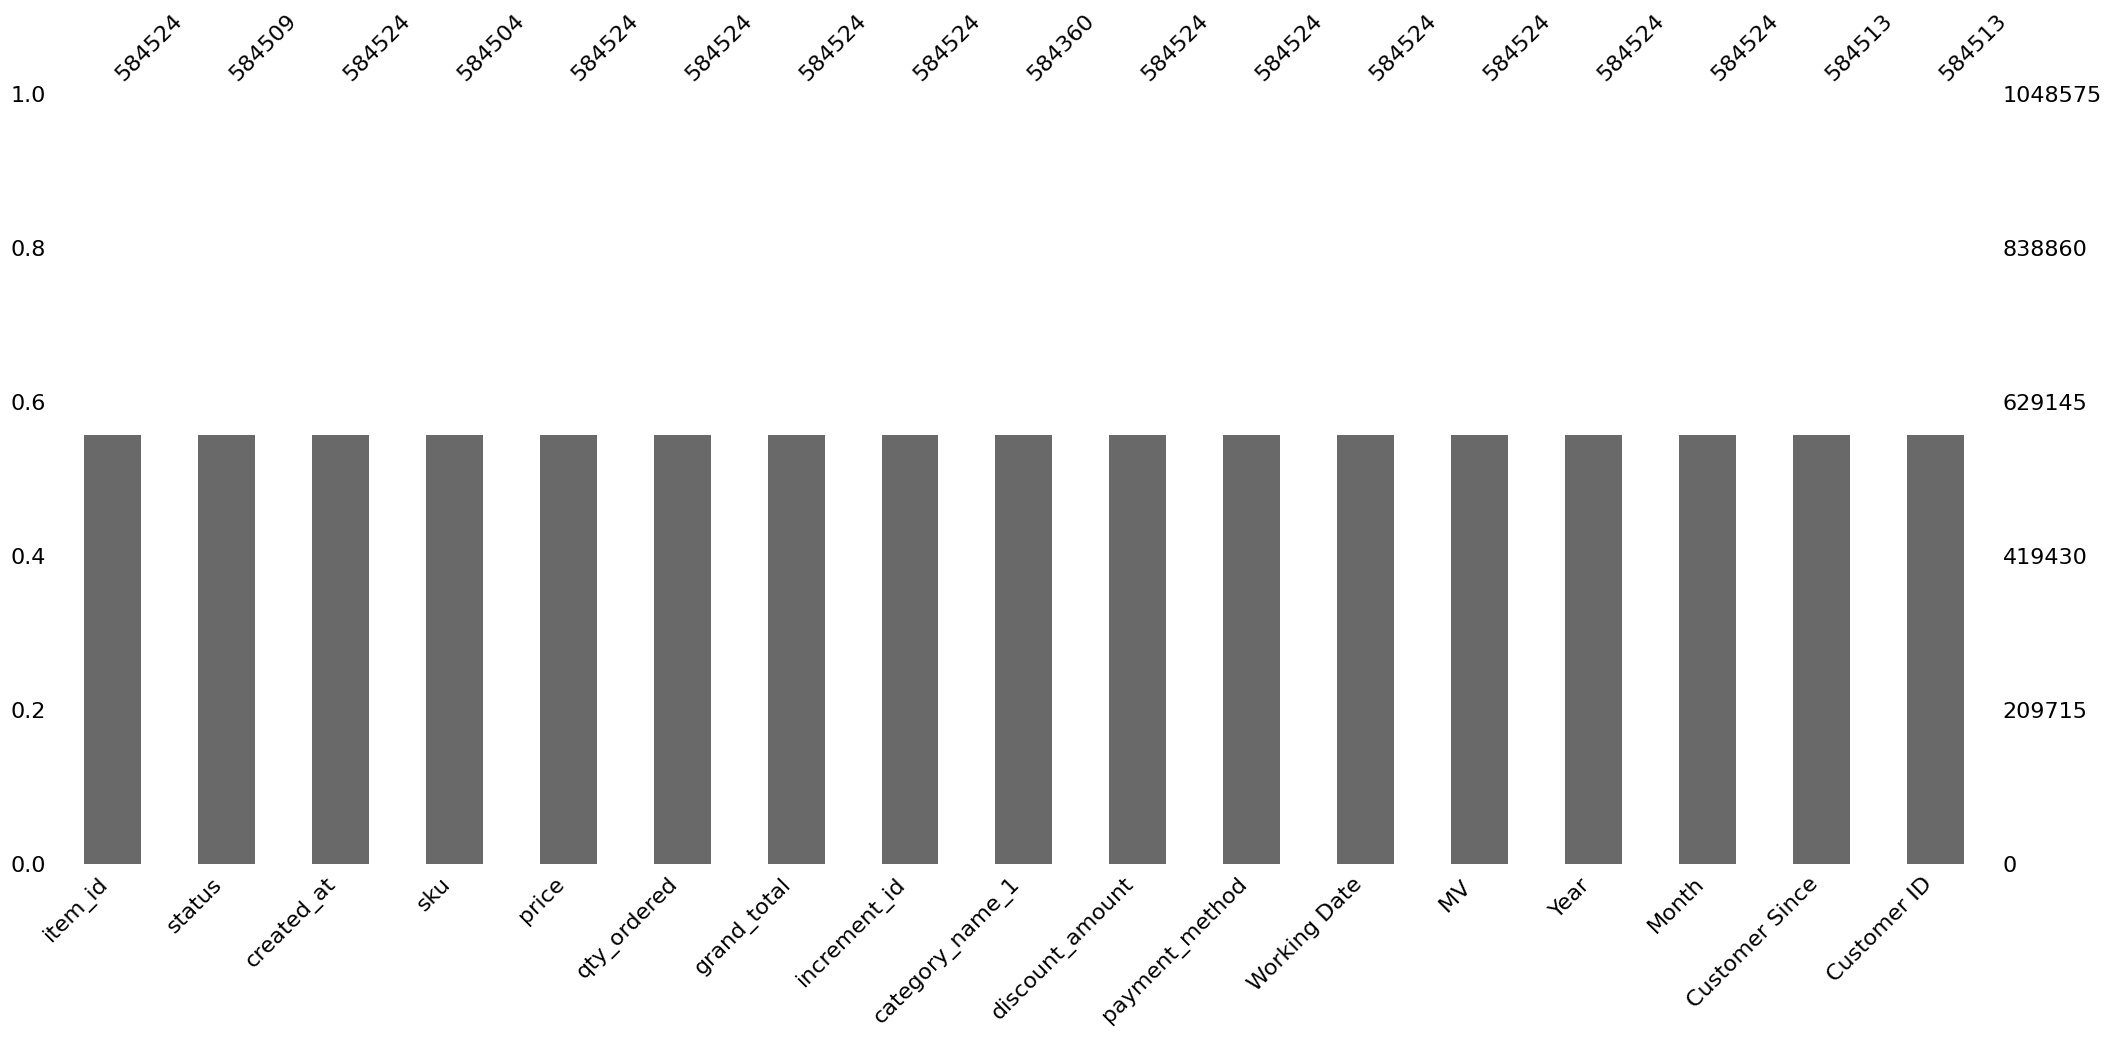

In [87]:
missingno.bar(df)

Based on the bar above, it appears that the dataset has missing values from index 584524 to 1048575. Therefore, I will delete those index.

In [88]:
df = df.drop(index=range(584524,1048575))

Based on the bar above, there are missing values in columns `status`, `sku`, `category_name_1`, `Customer Since`, and `Customer ID`. Therefore, I will handle the missing values in those columns.

- Column `status`

In [89]:
df['status'].describe()

count       584509
unique          16
top       complete
freq        233685
Name: status, dtype: object

Column `status` contains categorical data, so I will fill the missing values in the `status` column with the 'mode' value of that column. The 'mode' value in the `status` column is 'complete', so I will fill in the missing values with 'complete'.

In [90]:
df['status'] = df['status'].fillna('complete')

- Column `sku` and `category_name_1`

In [91]:
observed = pd.crosstab(df['sku'],df['category_name_1'])
from scipy.stats import chi2_contingency

chi2, pvalue, _, _ = chi2_contingency(observed)

if pvalue < 0.05:
    print("Significant")
else:
    print("No Significant")

Significant


Column `sku` contains categorical data that has a 'significant' correlation with the `category_name_1` column. This is reasonable because the `category_name_1` column functions to group each product name into several categories. Therefore, I will fill the missing values in `sku` column with the 'mode' value based on `category_name_1` column and also will fill the missing values in `category_name_1` column with the 'mode' value based on `sku` column.

In [92]:
missing_values_sku = df[df['sku'].isnull()]['category_name_1'].unique()

for category in missing_values_sku:
    most_frequent_sku = df[df['category_name_1']==category]['sku'].mode().loc[0]  
# most_frequent_sku = 'ENTECO5A7FE80D6C830'

The missing value in the `sku` column corresponds to 2 unique categories in the `category_name_1` column, namely : `\N` and `Entertainment`. Among these categories, it was found that 'ENTECO5A7FE80D6C830' was the most frequently (mode) occurring `sku` value. Therefore, I will fill the missing values in the `sku` column with the value 'ENTECO5A7FE80D6C830'.

In [93]:
df['sku'] = df['sku'].fillna(most_frequent_sku)

In [94]:
missing_values_ct = df[df['category_name_1'].isnull()]['sku'].nunique()
ex_freq_ct = df.loc[df['sku'].str.startswith('MEF')]['category_name_1'].mode() #Men's Fashion
display(ex_freq_ct,missing_values_ct)

0    Men's Fashion
Name: category_name_1, dtype: object

16

The missing values in the `category_name_1` correspond to 16 unique in the `sku` column. However, if I deep observed in the values `sku` columns, it appears that the initials of the values correspond to the `category_name_1` column. For example in the 'ex_freq_ct' variable, if the string value starts with the 3 letters 'MEF', then the 'mode' value in the `category_name_1` column is 'Men's Fashion'.

Therefore I will fill the missing values in the `category_name_1` column based on the first three letters of the values in the `sku` column.

In [95]:
df.loc[df['sku'].str.startswith('MEF') & df['category_name_1'].isnull(), 'category_name_1'] = 'Men\'s Fashion'
df.loc[df['sku'].str.startswith('OTH') & df['category_name_1'].isnull(), 'category_name_1'] = 'Others'
df.loc[df['sku'].str.startswith('COM') & df['category_name_1'].isnull(), 'category_name_1'] = 'Computing'
df.loc[df['sku'].str.startswith('WOF') & df['category_name_1'].isnull(), 'category_name_1'] = 'Women\'s Fashion'
df.loc[df['sku'].str.startswith('MAT') & df['category_name_1'].isnull(), 'category_name_1'] = 'Mobiles & Tablets'
df.loc[df['sku'].str.startswith('BAG') & df['category_name_1'].isnull(), 'category_name_1'] = 'Beauty & Grooming'
df.loc[df['sku'].str.startswith('KAB') & df['category_name_1'].isnull(), 'category_name_1'] = 'Kids & Baby'

- Column `Customer Since` & `Customer ID`

In [96]:
observed = pd.crosstab(df['Customer Since'],df['Customer ID'])
from scipy.stats import chi2_contingency

chi2, pvalue, _, _ = chi2_contingency(observed)

if pvalue < 0.05:
    print("Significant")
else:
    print("No Significant")

Significant


In [97]:
customer_since_null = (df['Customer Since'].isnull().sum().sum()/len(df['Customer Since'])*100)
customer_id_null = (df['Customer ID'].isnull().sum().sum()/len(df['Customer ID'])*100)
print(f"Percentage Null Customer Since & Customer ID = {customer_since_null} & {customer_id_null}")

Percentage Null Customer Since & Customer ID = 0.001881873113849902 & 0.001881873113849902


Column `Customer Since` contains categorical data that has a 'significant' correlation with the `Customer ID` column. This make sense if `Customer ID` null then the `Customer Since` will also be null. In this case I will 'drop' null in the `Customer Since` and `Customer ID` columns, because Percentage null in that 2 columns is below 1% (0.0018%) 

<Axes: >

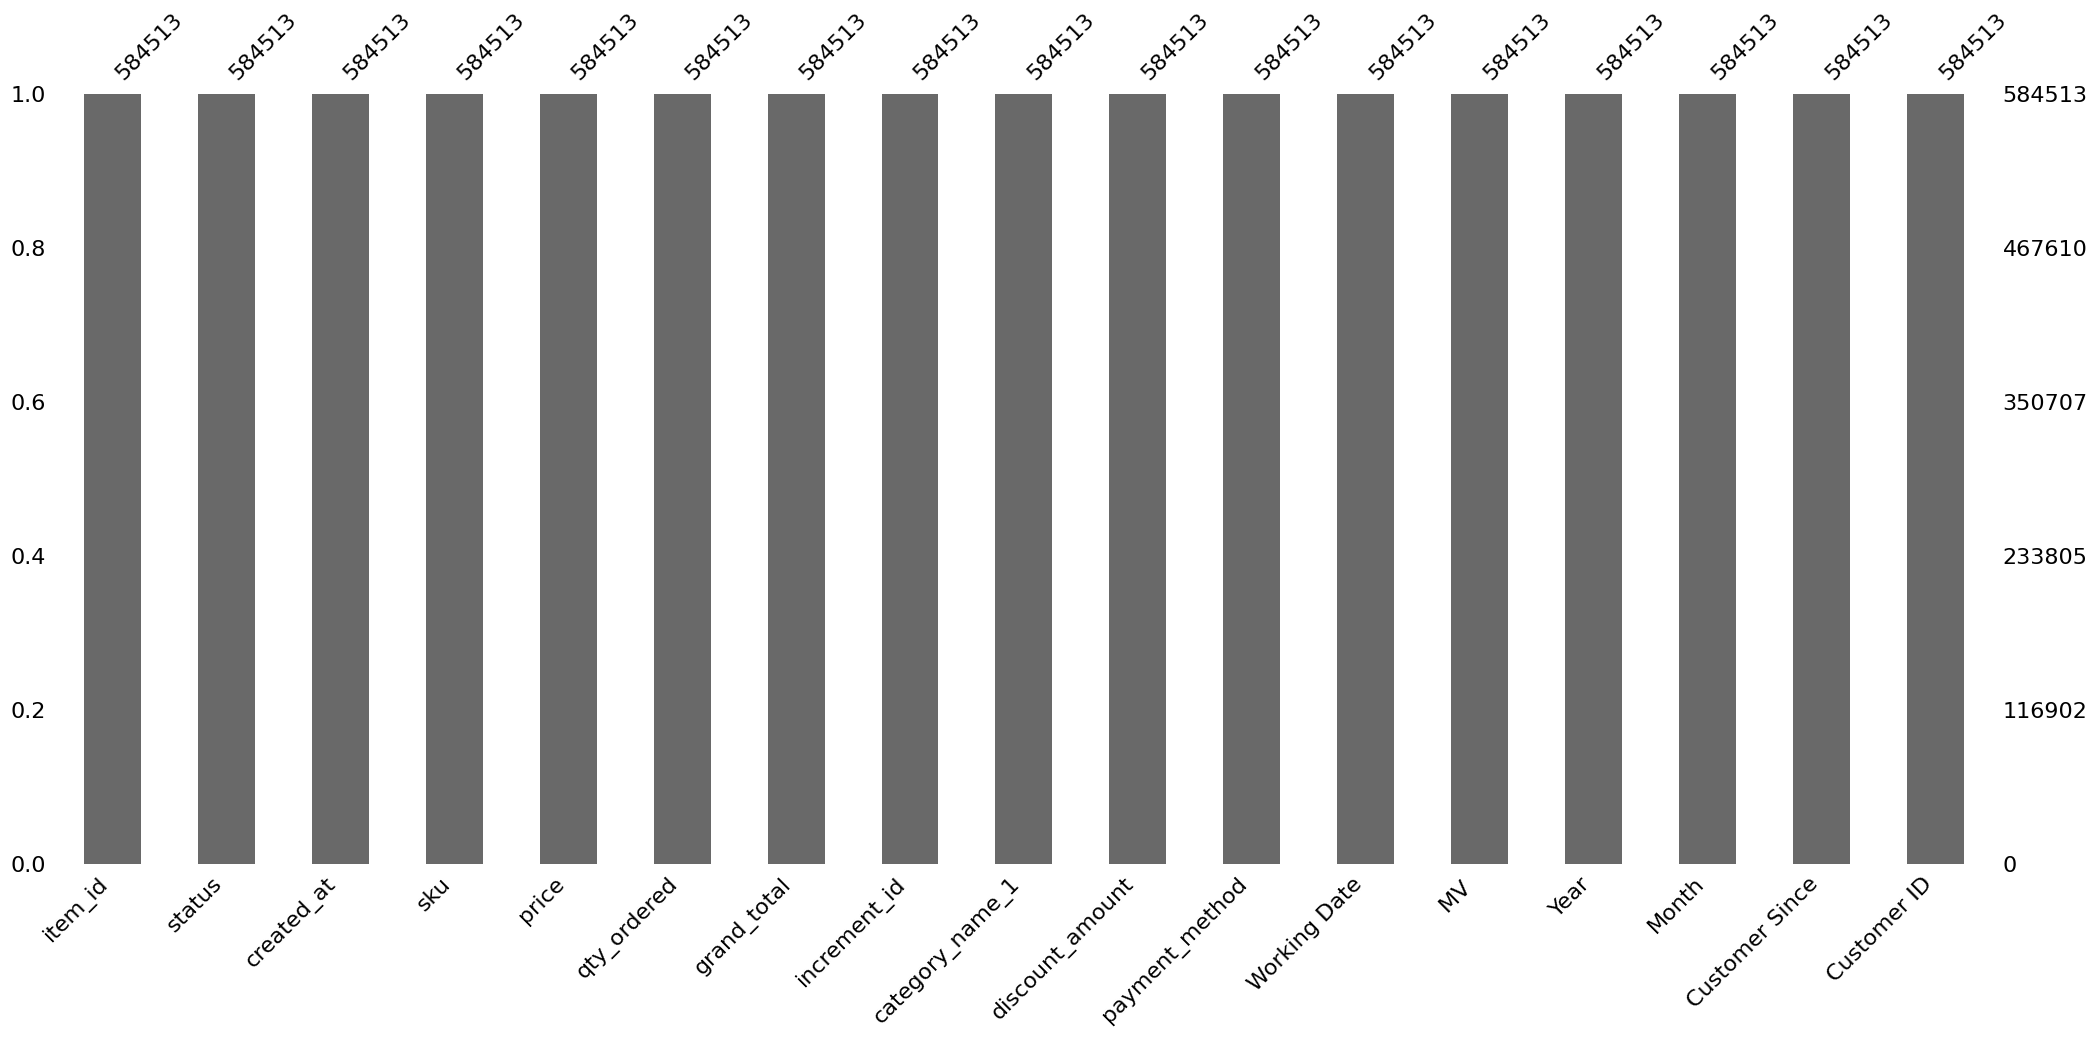

In [98]:
df.dropna(subset=['Customer ID', 'Customer Since'],inplace=True)
missingno.bar(df)

#### 3. Duplicate Value

In [99]:
df.duplicated().sum().sum()

0

there is no duplicat value

### **Exploratory Data Analysis**

First, I want to know what trend transaction in E-Commerce Pakistan from March 2016 to August 2018.

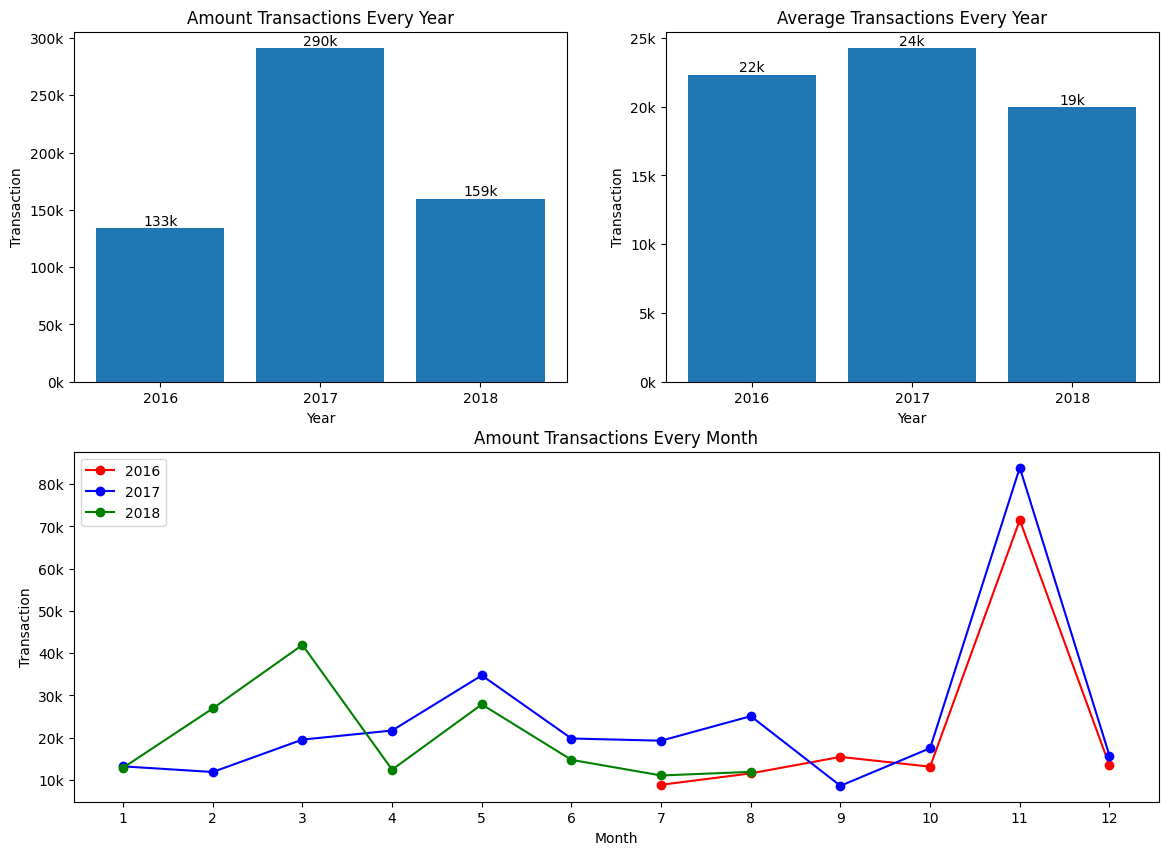

In [100]:
#Data
avg_year = df.groupby(['Year'])['item_id'].count().reset_index()
df_month = df.groupby(['Year'])['Month'].nunique().reset_index()
avg_year['month'] = df_month['Month']
avg_year['avg_month'] = avg_year['item_id'] / avg_year['month']
transaction_by_month = df.groupby(['Year','Month'])['item_id'].count().reset_index()
x_2016 = transaction_by_month['Month'][transaction_by_month['Year']==2016]
y_2016 = transaction_by_month['item_id'][transaction_by_month['Year']==2016]
x_2017 = transaction_by_month['Month'][transaction_by_month['Year']==2017]
y_2017 = transaction_by_month['item_id'][transaction_by_month['Year']==2017]
x_2018 = transaction_by_month['Month'][transaction_by_month['Year']==2018]
y_2018 = transaction_by_month['item_id'][transaction_by_month['Year']==2018]

#Visualization
fig,ax = plt.subplots(2,2,figsize=(14,10))
xticks = np.arange(2016,2019)

ax1 = plt.subplot(221)
bar = ax1.bar(data=avg_year,x='Year',height='item_id')
bar = ax1.bar_label(bar, labels=[str(int(height/1000))+'k' for height in avg_year['item_id']])
bar = ax1.set(xlabel='Year',ylabel='Transaction',title='Amount Transactions Every Year')
ylabel = [str(int(height/1000)) + 'k' for height in plt.gca().get_yticks()]
bar = plt.gca().set_yticklabels(ylabel)
bar = ax1.set_xticks(xticks)

ax2 = plt.subplot(222)
bar1 = ax2.bar(data=avg_year,x='Year',height='avg_month')
bar1 = ax2.bar_label(bar1, labels=[str(int(height/1000))+'k' for height in avg_year['avg_month']])
bar1 = ax2.set(xlabel='Year',ylabel='Transaction',title='Average Transactions Every Year')
ylabel = [str(int(height/1000)) + 'k' for height in plt.gca().get_yticks()]
bar1 = plt.gca().set_yticklabels(ylabel)
bar1 = ax2.set_xticks(xticks)

ax3 = plt.subplot(212)
lines = ax3.plot(x_2016,y_2016,marker='o',color='red',label='2016')
lines = ax3.plot(x_2017,y_2017,marker='o',color='blue',label='2017')
lines = ax3.plot(x_2018,y_2018,marker='o',color='green',label='2018')
lines = plt.sca(ax3)
lines = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
lines = ax3.set_title('Amount Transactions Every Month')
lines = ax3.set_xlabel('Month')
lines = ax3.set_ylabel('Transaction')
ylabel = [str(int(height/1000)) + 'k' for height in plt.gca().get_yticks()]
lines = plt.gca().set_yticklabels(ylabel)
lines = ax3.legend(loc='upper left')

plt.show()

Based on the visualization above, I have gained some insights :
- The average number of transactions fluctuates each year. There was an increase of 1925 average transactions and 157.011 amount transactions from 2016 to 2017, but a decrease of 4283 average transactions and 131.272 amount transactions from 2017 to 2018.
- The highest number of transactions occurs in November 2016 and 2017.

Next, I will try to analyze the factors that influence the transaction trend and other things to get more insight.

- Based on `discount_amount`

I want to know whether `discount_amount` affects the trend transactions.

In [101]:
#Data
discount = df.loc[df['discount_amount'] != 0].groupby(['Year','Month'])['item_id'].count().reset_index()
transaction_discount = df.groupby(['Year','Month'])['item_id'].count().reset_index()
transaction_discount['count_discount'] = discount['item_id']

correlation = transaction_discount.corr()

transaction = transaction_discount.groupby('Month')['item_id'].sum()
discount = transaction_discount.groupby('Month')['count_discount'].sum()

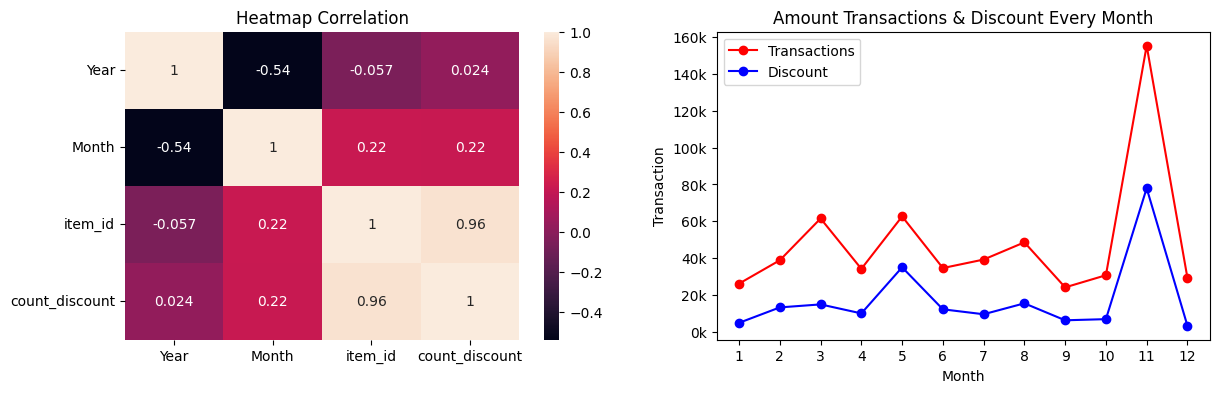

In [102]:
#Visualization
fig,ax = plt.subplots(1,2,figsize=(14,4))
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]

heatmap = sns.heatmap(correlation,annot=True,ax=ax[0])
heatmap = ax[0].set(title='Heatmap Correlation')

plot = ax[1].plot(transaction,marker='o',color='red',label='Transactions')
plot = ax[1].plot(discount,marker='o',color='blue',label='Discount')
plot = plt.sca(ax[1])
plot = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plot = ax[1].set_title('Amount Transactions & Discount Every Month')
plot = ax[1].set_xlabel('Month')
plot = ax[1].set_ylabel('Transaction')
ylabel = [str(int(height/1000)) + 'k' for height in plt.gca().get_yticks()]
plot = plt.gca().set_yticklabels(ylabel)
plot = ax[1].legend(loc='upper left')

In the heatmap above there is a significant correlation between the number of transactions and the discount amount, it is very possible if the number of discounts increases, then the trend of transactions will also increase. For instance, in the lineplot above the highest number of transactions occurred in November, which was caused by the many discounts offered in that month.

In [103]:
transct_all = df.groupby('Month')['item_id'].count().reset_index()
transct_all = transct_all.rename(columns={'item_id':'total_transaction'})
transct_disct = df.loc[df['discount_amount'] != 0].groupby('Month')['item_id'].count().reset_index()
transct_all['transaction_discount'] = transct_disct['item_id']
transct_no_disct = df.loc[df['discount_amount'] == 0].groupby('Month')['item_id'].count().reset_index()
transct_all['transaction_no_discount'] = transct_no_disct['item_id']
avg = transct_all.mean()
transct_all.loc[12] = avg
transct_all = transct_all.rename(index={12: 'Avg'})
transct_all

,Month,total_transaction,transaction_discount,transaction_no_discount
0,1.0,26063.000000,4737.0,21326.000000
1,2.0,38777.000000,13127.0,25650.000000
2,3.0,61482.000000,14758.0,46724.000000
3,4.0,34091.000000,9861.0,24230.000000
4,5.0,62603.000000,34938.0,27665.000000
5,6.0,34530.000000,12085.0,22445.000000
6,7.0,39151.000000,9400.0,29751.000000
7,8.0,48514.000000,15343.0,33171.000000
8,9.0,24024.000000,6114.0,17910.000000
9,10.0,30623.000000,6737.0,23886.000000


Based on dataframe above, I Know the average total_transaction 48.709, transaction_discount 17.351, transaction_no_discount 31.357. 

- Based on `price` and `category_name_1`

I want to know if the average total `price` of all `category_name 1` from 2016 to 2018 affects the trend transactions.

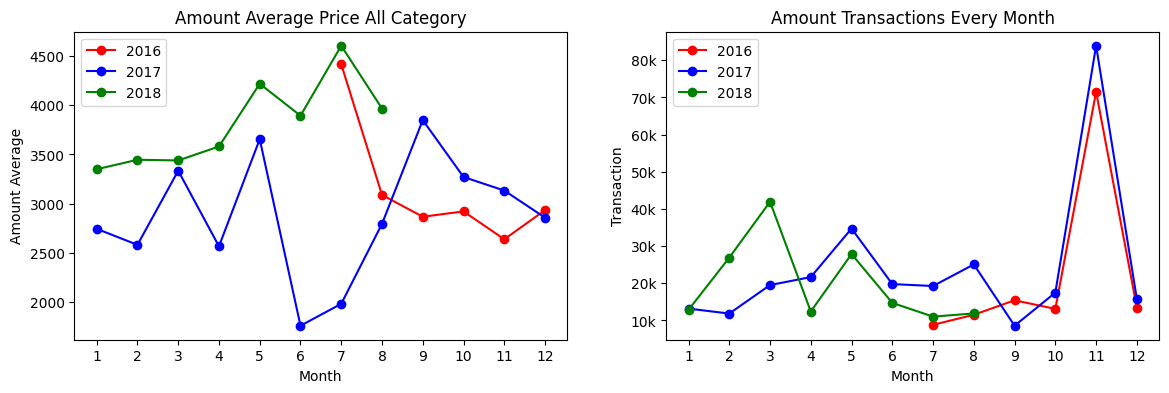

In [104]:
#Data
category_2016 = df.loc[df['Year']==2016].drop_duplicates(subset=['sku'])[['sku', 'price', 'category_name_1','Month']].groupby('Month')['price'].mean()
category_2017 = df.loc[df['Year']==2017].drop_duplicates(subset=['sku'])[['sku', 'price', 'category_name_1','Month']].groupby('Month')['price'].mean()
category_2018 = df.loc[df['Year']==2018].drop_duplicates(subset=['sku'])[['sku', 'price', 'category_name_1','Month']].groupby('Month')['price'].mean()

#Visualization
fig,ax = plt.subplots(1,2,figsize=(14,4))
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]

plot = ax[0].plot(category_2016,marker='o',color='red',label='2016')
plot = ax[0].plot(category_2017,marker='o',color='blue',label='2017')
plot = ax[0].plot(category_2018,marker='o',color='green',label='2018')
plot = plt.sca(ax[0])
plot = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plot = ax[0].set_title('Amount Average Price All Category')
plot = ax[0].set_xlabel('Month')
plot = ax[0].set_ylabel('Amount Average')
plot = ax[0].legend(loc='upper left')

lines = ax[1].plot(x_2016,y_2016,marker='o',color='red',label='2016')
lines = ax[1].plot(x_2017,y_2017,marker='o',color='blue',label='2017')
lines = ax[1].plot(x_2018,y_2018,marker='o',color='green',label='2018')
lines = plt.sca(ax[1])
lines = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
lines = ax[1].set_title('Amount Transactions Every Month')
lines = ax[1].set_xlabel('Month')
lines = ax[1].set_ylabel('Transaction')
ylabel = [str(int(height/1000)) + 'k' for height in plt.gca().get_yticks()]
lines = plt.gca().set_yticklabels(ylabel)
lines = ax[1].legend(loc='upper left')


In the two lineplots above, the number of transactions does not appear to be influenced by the average prices of all product categories. For instance, the average prices in June are low (left plotline), but the number of transactions is also low (right plotline). Ideally, if the average prices are low, we would expect the number of transactions to be high.

- Based on `qty_ordered`

I want to know whether the number of transactions affects the amount of `qty_ordered`

In [105]:
#Data
qty_ordered = df.groupby(['Year','Month'])['qty_ordered'].sum().reset_index()
transaction_qtyordered = df.groupby(['Year','Month'])['item_id'].count().reset_index()
transaction_qtyordered['count_qtyordered'] = qty_ordered['qty_ordered']
correlation1 = transaction_qtyordered.corr()
transactions = transaction_qtyordered.groupby('Month')['item_id'].sum()
qty_ordereds = transaction_qtyordered.groupby('Month')['count_qtyordered'].sum()

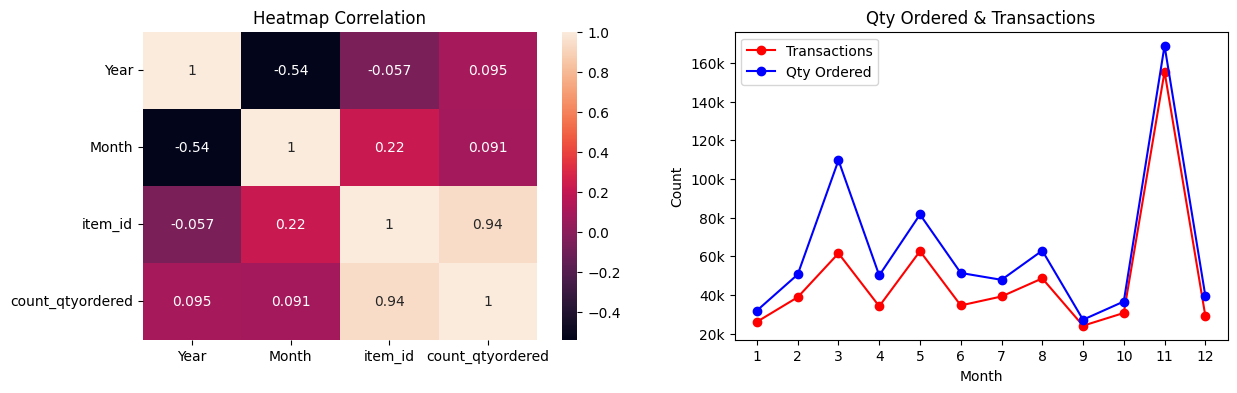

In [106]:
#Visualization
fig,ax = plt.subplots(1,2,figsize=(14,4))
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]

heatmap = sns.heatmap(correlation1,annot=True,ax=ax[0])
heatmap = ax[0].set(title='Heatmap Correlation')

plot = ax[1].plot(transactions,marker='o',color='red',label='Transactions')
plot = ax[1].plot(qty_ordereds,marker='o',color='blue',label='Qty Ordered')
plot = plt.sca(ax[1])
plot = plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plot = ax[1].set_title('Qty Ordered & Transactions')
plot = ax[1].set_xlabel('Month')
plot = ax[1].set_ylabel('Count')
ylabel = [str(int(height/1000)) + 'k' for height in plt.gca().get_yticks()]
plot = plt.gca().set_yticklabels(ylabel)
plot = ax[1].legend(loc='upper left')

In the heatmap above, there is a significant correlation between the number of transactions and the qty_ordered amount. it is very possible if the number of transactions increase, then the qty_ordered amount will also increase. For instance, in the lineplot above the highest number of qty_ordered occurred in November, which was caused by the many transactions in that month.

- Based on `category_name_1`

I want to know which product categories are selling best, and why those products are selling best.

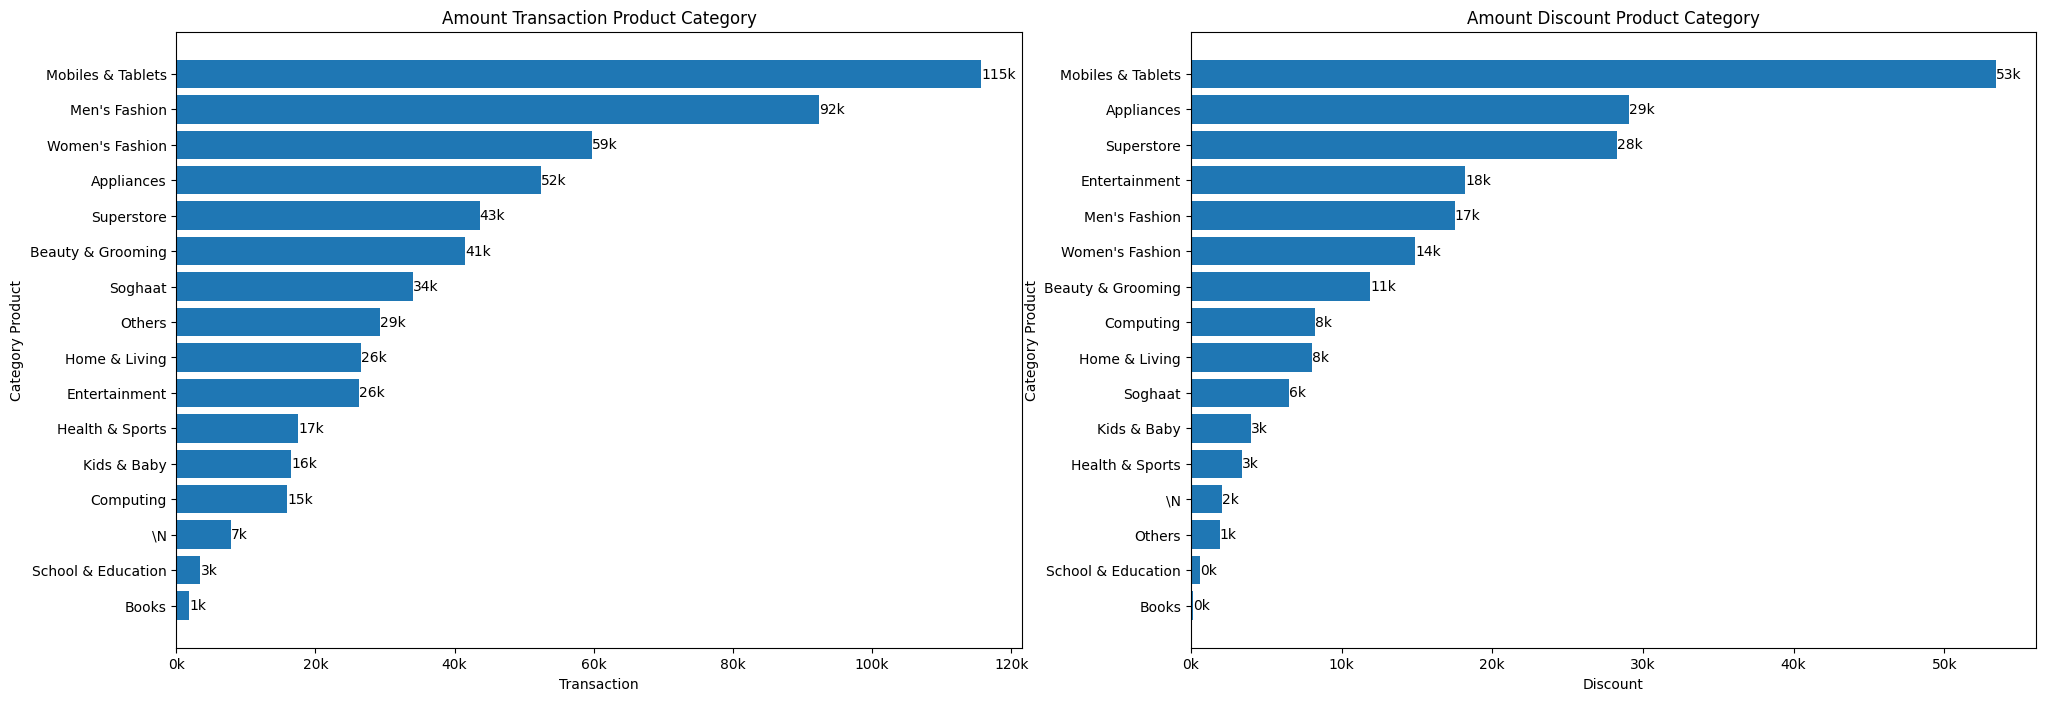

In [107]:
best_selling = df.groupby('category_name_1')['item_id'].count().reset_index().sort_values('item_id',ascending=True)
discount = df.loc[df['discount_amount'] != 0].groupby(['category_name_1'])['item_id'].count().reset_index().sort_values('item_id',ascending=True)

fig,ax = plt.subplots(1,2,figsize=(24,8))

bar = ax[0].barh(data=best_selling,y='category_name_1',width='item_id')
bar = ax[0].bar_label(bar,labels=[str(int(width/1000))+'k' for width in best_selling['item_id']])
bar = ax[0].set(xlabel='Transaction',ylabel='Category Product',title='Amount Transaction Product Category')
xlabel = [str(int(width/1000)) + 'k' for width in ax[0].get_xticks()]
bar = ax[0].set_xticklabels(xlabel)

bar1 = ax[1].barh(data=discount,y='category_name_1',width='item_id')
bar1 = ax[1].bar_label(bar1,labels=[str(int(width/1000))+'k' for width in discount['item_id']])
bar1 = ax[1].set(xlabel='Discount',ylabel='Category Product',title='Amount Discount Product Category')
xlabel = [str(int(width/1000)) + 'k' for width in plt.gca().get_xticks()]
bar1 = plt.gca().set_xticklabels(xlabel)

Based on the two barplots above, the category with the most product sales is 'Mobile & Tablet', because it has a large number of discounts.

Based on `payment_method`

I want to know which the most payment method used in e-commerce pakistan. 

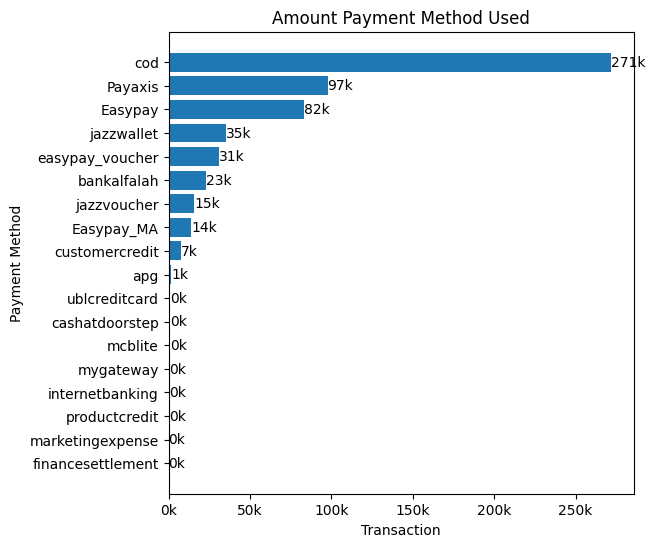

In [108]:
#Data
payment_method = df.groupby('payment_method')['item_id'].count().reset_index().sort_values('item_id',ascending=True)

#Visualization
fig, ax = plt.subplots(1, figsize=(6, 6))
bar = plt.barh(data=payment_method,y='payment_method',width='item_id')
bar = plt.bar_label(bar,labels=[str(int(width/1000))+'k' for width in payment_method['item_id']])
bar = plt.xlabel('Transaction')
bar = plt.ylabel('Payment Method')
bar = plt.title('Amount Payment Method Used')
xlabel = [str(int(width/1000)) + 'k' for width in ax.get_xticks()]
bar = ax.set_xticklabels(xlabel)

Based on the barplots above, the most commonly used payment method is COD (Cash on Delivery).

Based on `Customer ID`, `item_id`, `discount_amount`

I would like to know the average number of transactions for each `Customer ID` that receive a discount and those that do not receive a discount, there is a significant difference or not.

In [109]:
customer_transactions = df.groupby('Customer ID')['item_id'].count().reset_index()
discount = df.loc[df['discount_amount'] != 0]
customer_transactions_get_discount = discount.groupby('Customer ID')['discount_amount'].count().reset_index()
merged_data = pd.merge(customer_transactions, customer_transactions_get_discount, how='outer',on='Customer ID').fillna(0)
sample_merge_data = merged_data.sample(5000,random_state=100)

In [110]:
from scipy.stats import shapiro

stat,pvalue = shapiro(sample_merge_data['item_id'])
if pvalue < 0.05:
    print("Distribution Not Normal")
else:
    print("Distribution Normal")

Distribution Not Normal


In [111]:
from scipy.stats import mannwhitneyu

data_with_discount = sample_merge_data.loc[sample_merge_data['discount_amount'] > 0, 'item_id']
data_without_discount = sample_merge_data.loc[sample_merge_data['discount_amount'] == 0, 'item_id']

t_stat, p_value = mannwhitneyu(data_with_discount, data_without_discount)

if p_value < 0.05:
    print('Significant Differences')
else:
    print('No Significant Differences')

data_with_discount_avg = data_with_discount.mean()
data_without_discount_avg = data_without_discount.mean()
print("Average Transaction Get Discount : ",data_with_discount_avg)
print("Average Transaction Not Get Discount : ",data_without_discount_avg)

Significant Differences
Average Transaction Get Discount :  10.833964646464647
Average Transaction Not Get Discount :  2.706381733021077


Based on the results of the Shapiro test, the data is not normally distributed. Therefore, I used the Mann-Whitney U test for statistical test. The results of the Mann-Whitney U test indicate a 'Significant Difference' in the average number of transactions between those that receive a discount and those that do not receive a discount. The average number of transactions for customers who receive a discount is 10.83, while for those who do not receive a discount, it is 2.70.

### **Conclusion & Recommendation**

**Conclusion**

- The number of transactions from 2017 to 2018 showed a decrease of 131,272 transactions. However, it is important to note that in 2018, transactions were only recorded from 'January' to 'October'. 

  There is a possibility that the total number of transactions in 2018 would surpass that of 2017 if it continued until the end of the year. This assumption is based on the average monthly transaction count of 48,709 transactions.

  If I estimate that the total transactions by the end of 2018 will be 354,520 transactions. However, it should be noted that there are monthly discounts of 17,351 transactions until the end of 2018.

- Most transactions occurred in 'November' because there is a Public Holiday in Pakistan called **Iqbal Day** on November 9.

- The large number of discounts greatly affects transactions trend and also the quantity orders, best-selling product categories, and customer purchasing power.

- The most payment method is COD (Cash On Delivery). According to Pakistani people, COD gives them sense of security, ease and as they consider it a tool to have more control over the buying process.                                            
Reference : https://journals.sagepub.com/doi/epub/10.1177/2158244020917392

**Recommendation**

- Give lots of discounts not only in 'November' because of **Iqbal Day**. However, giving lots of discounts can be done in other months such as :
    - February  : Because there is **Pakistan Day** in 23th of February.
    - August    : Because there is **Independence Day** in 14th of August.
    - September : Because there is **Defence Day** in 6th of Septmeber
  
  Reference : https://www.pakshaheens.com/public-holidays-of-pakistan/

- Providing discounts is not only based on the number of customer transactions, but can also based on the duration of the customer join to help enhance customer purchasing power. 

- Provide Education Pakistanis about the benefits of utilizing payment methods other than Cash on Delivery (COD). Additionally, can also give discounts for selecting payment methods other than Cash on Delivery (COD).

- Doing Marketing Campaigns on Social Media. Because there are so many benefits, one of them  can give Impact sales and conversion rates.
  
  Reference : https://business.adobe.com/blog/basics/smm-benefits#impact-sales-and-conversion-rates
